In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/android/apps.csv
/kaggle/input/android/user_reviews.csv


**Import Libraries** 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load Data**

In [ ]:
apps=pd.read_csv('/kaggle/input/android/apps.csv',index_col=0)
reviews=pd.read_csv('/kaggle/input/android/user_reviews.csv',index_col=0)

**Data exploration of Apps DataFrame**

In [ ]:
apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
print(f"apps DataFrame contain set of features are {apps.columns}")

apps DataFrame contain set of features are Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [ ]:
# get statistics information from data , include(numerical,categorical)
apps.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659,9659,8196.000000,9.659000e+03,8432.000000,9659,9659,9659,9659,9659,9659,9651,9657
unique,9659,33,NaN,NaN,NaN,21,2,92,6,118,1377,2769,33
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,NaN,NaN,NaN,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1832,NaN,NaN,NaN,1417,8903,8903,7903,826,252,1055,2202
mean,NaN,NaN,4.173243,2.165926e+05,20.395327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.536625,1.831320e+06,21.827509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,2.500000e+01,4.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,9.670000e+02,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,2.940100e+04,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# get information about apps dataframe and the datatypes of each feature 
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [ ]:
# get a part of apps DataFrame
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# get the number  of Apps 
apps["App"].value_counts() 

Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9659, dtype: int64

All apps are unique

In [ ]:
# get the number of Categories for each App 
apps["Category"].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

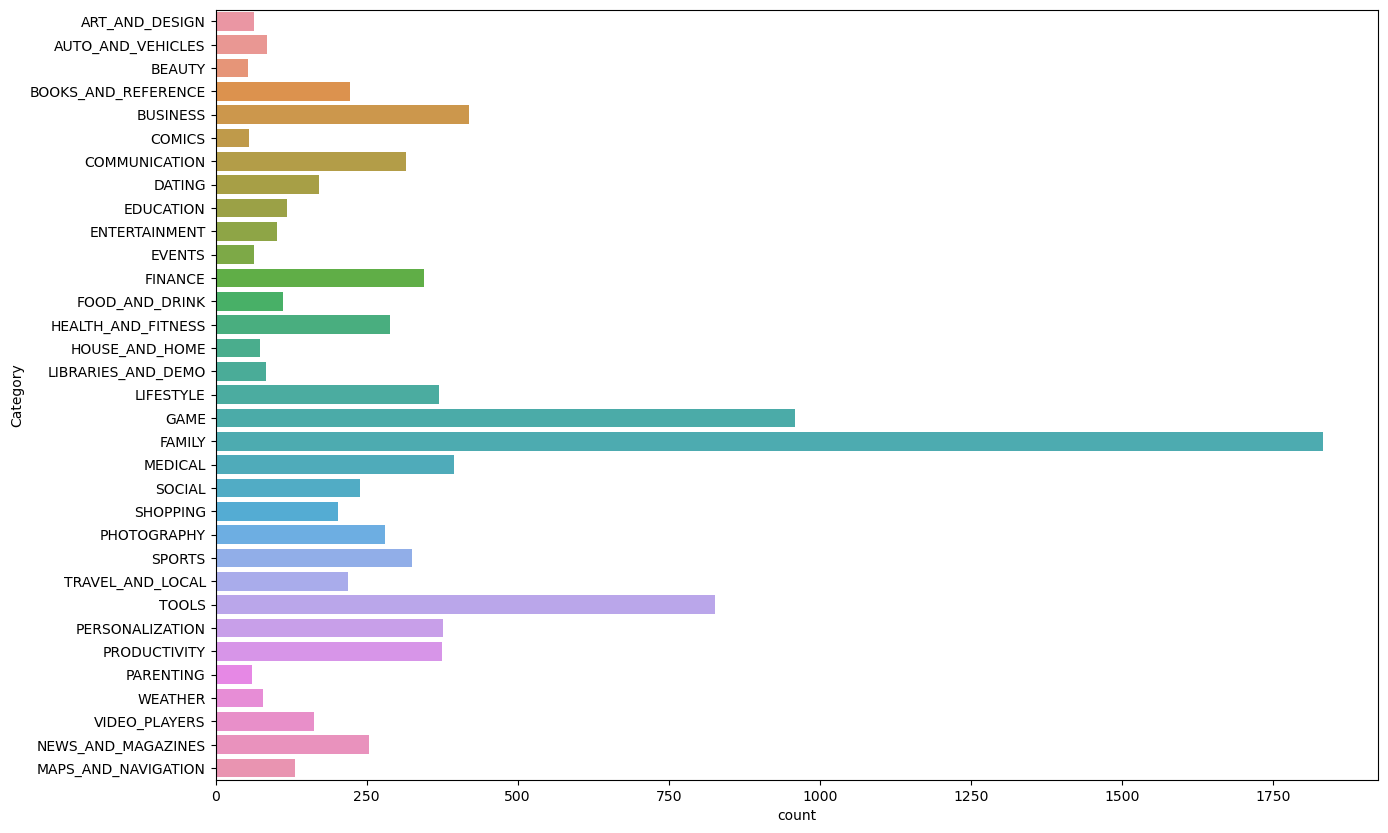

In [ ]:
# make visualization of number of Categories for each App 
plt.figure(figsize=(15,10))
sns.countplot(y="Category",data=apps)

We notice that the the most Categories have a large set of Apps is "FAMILY" then "Games"

In [ ]:
 # get the average of rating for each Category 
avg_rating=apps.groupby('Category')['Rating'].mean()
avg_rating

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179664
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.039554
TRAVEL_AND_LOCAL       4.069519

<Axes: xlabel='Category'>

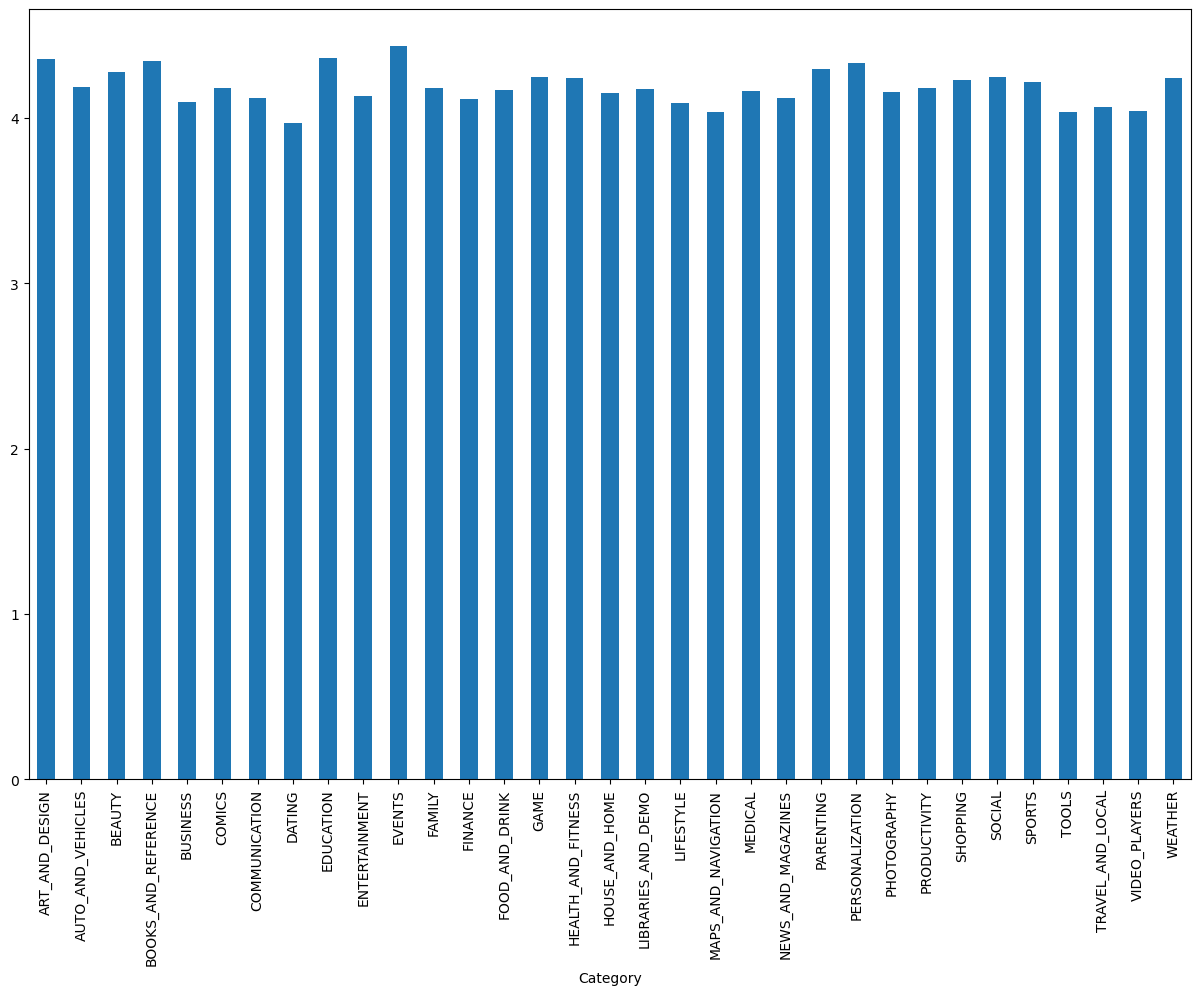

In [ ]:
plt.figure(figsize=(15,10))
avg_rating.plot(kind='bar')

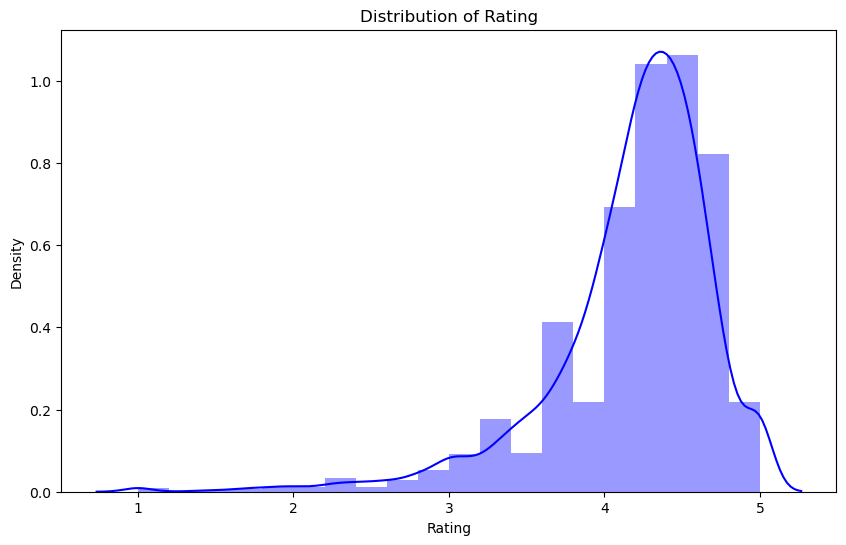

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(apps.Rating, bins = 20, color = "b")
plt.title("Distribution of Rating", fontsize = 12)
plt.show()

most of the apps got ratings  between 4 to 4.5, means people are liking most of the apps

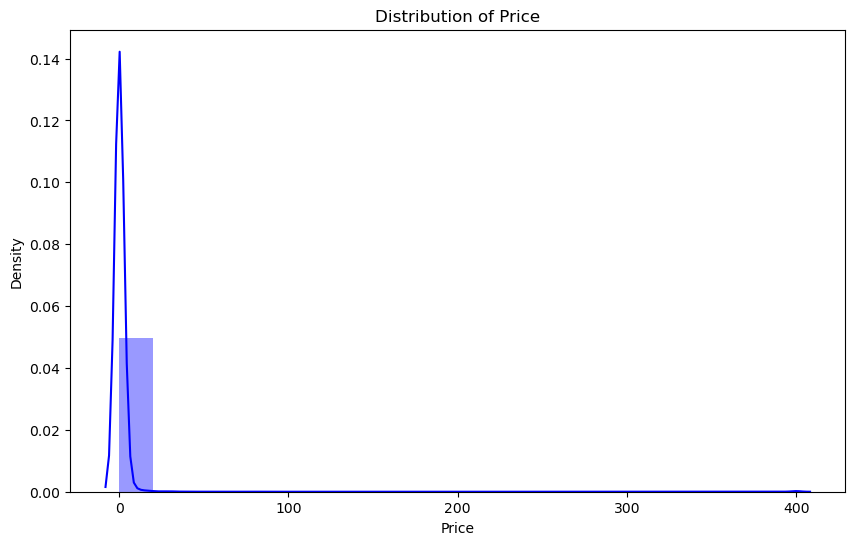

In [ ]:
# price 
plt.figure(figsize=(10,6))
sns.distplot(apps.Price, bins = 20, color = "b")
plt.title("Distribution of Price", fontsize = 12)
plt.show()
# hence most of the apps are free

The Data of 'Price' skewed to Right because most apps are free and the price of free apps is 0

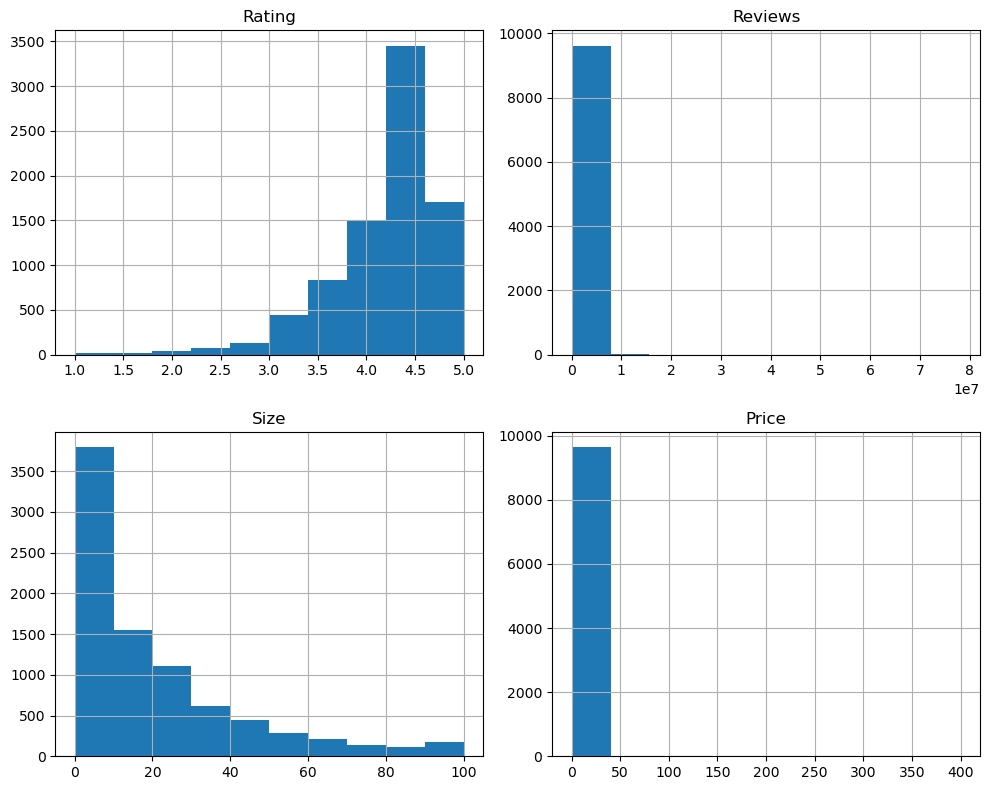

In [ ]:
# Histograms of numerical columns
apps.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

<Axes: xlabel='Reviews', ylabel='Rating'>

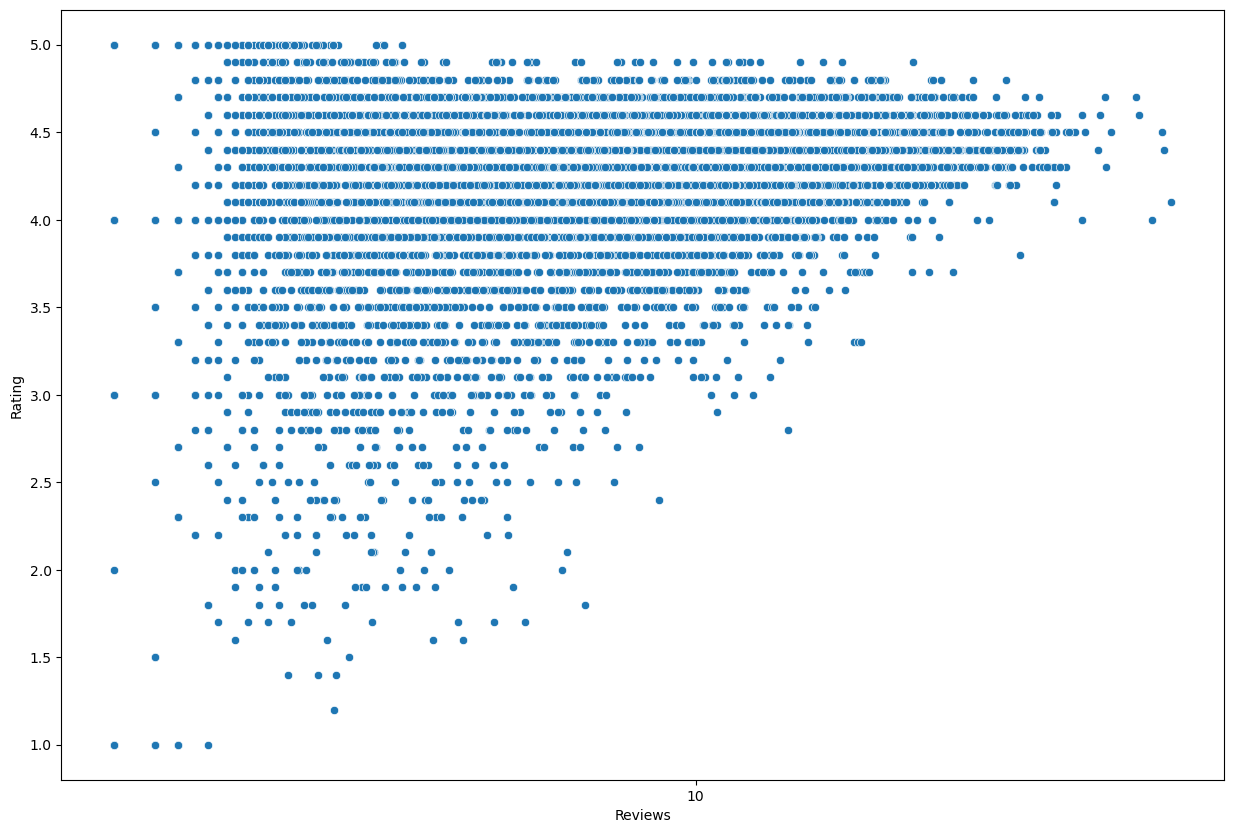

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks([-20,-10,10,20,30,40,50])
apps["Reviews"]=np.log(apps["Reviews"])
sns.scatterplot(x="Reviews",y="Rating",data=apps)

No relation between the number of reviews and ratings

<Axes: xlabel='Size', ylabel='Installs'>

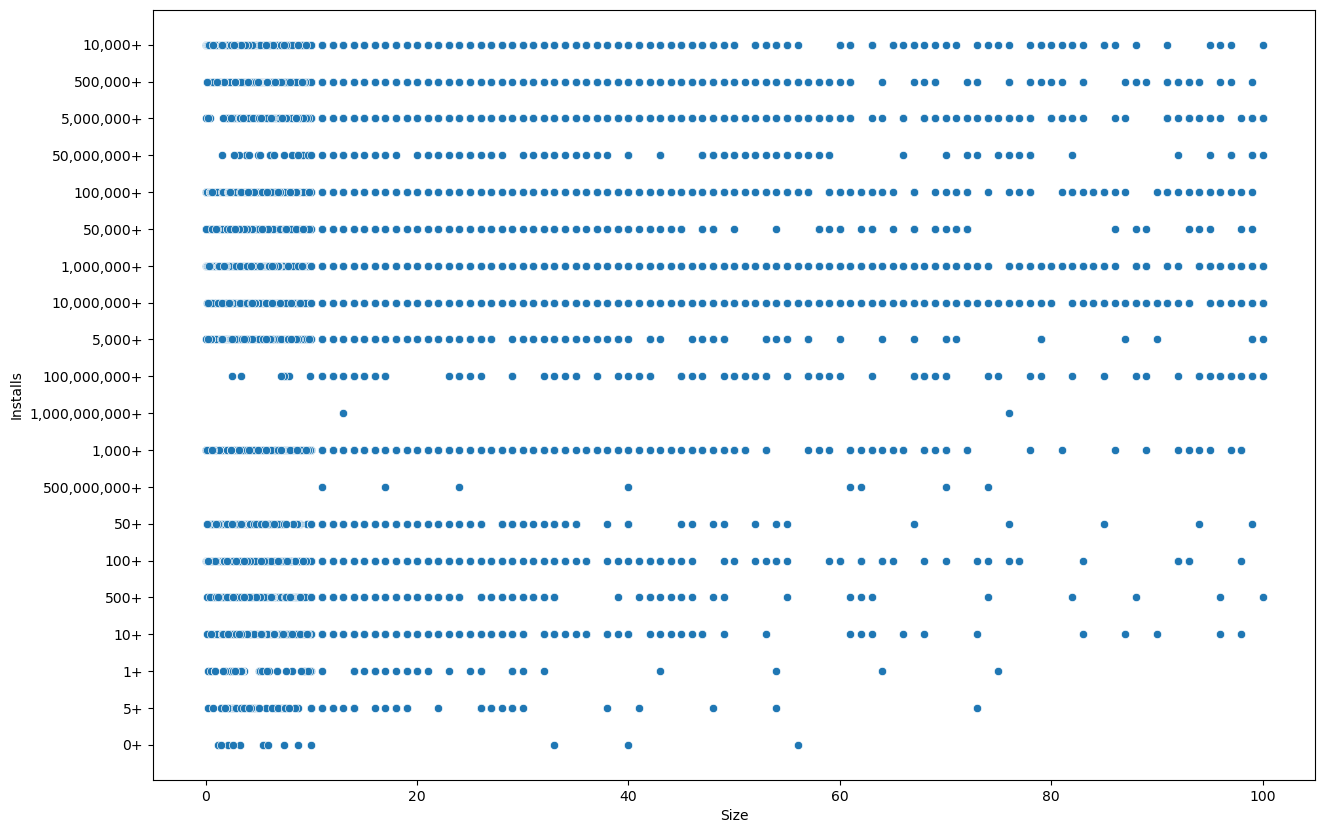

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Size",y="Installs",data=apps) 

Also, No relation between the number of Installs and Size

In [ ]:
apps["Type"].value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

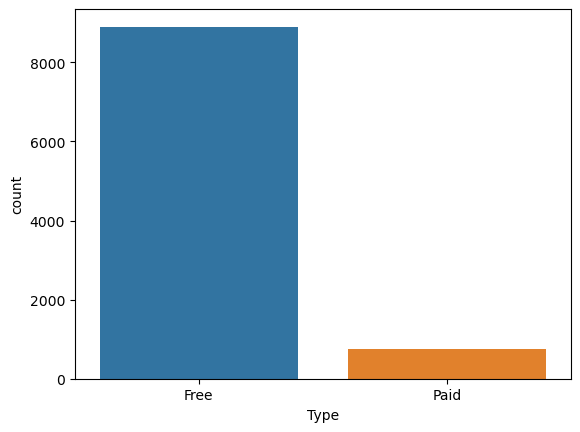

In [ ]:
# we detect that many apps are "free" and a small number of them is "paid"
sns.countplot(x="Type",data=apps) 

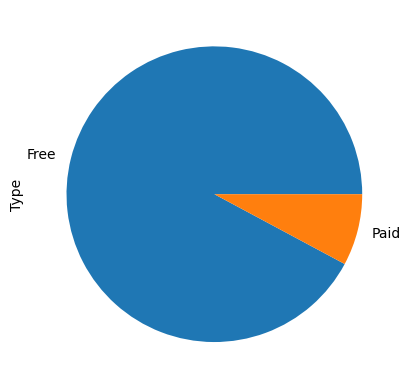

In [ ]:
apps.Type.value_counts().plot.pie()
plt.show()

From the previous two plots we detect that the most of apps are free

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# get two dataframe for 'free' and 'paid'
free=apps[apps["Type"]=="Free"]
paid=apps[apps["Type"]=="Paid"]

In [ ]:
# the maximum number of installs in case of "free" type
np.max(free["Installs"])

'500,000,000+'

In [ ]:
# the maximum number of installs in case of "paid" type
np.max(paid["Installs"])

'500,000+'

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<Axes: xlabel='Content Rating', ylabel='count'>

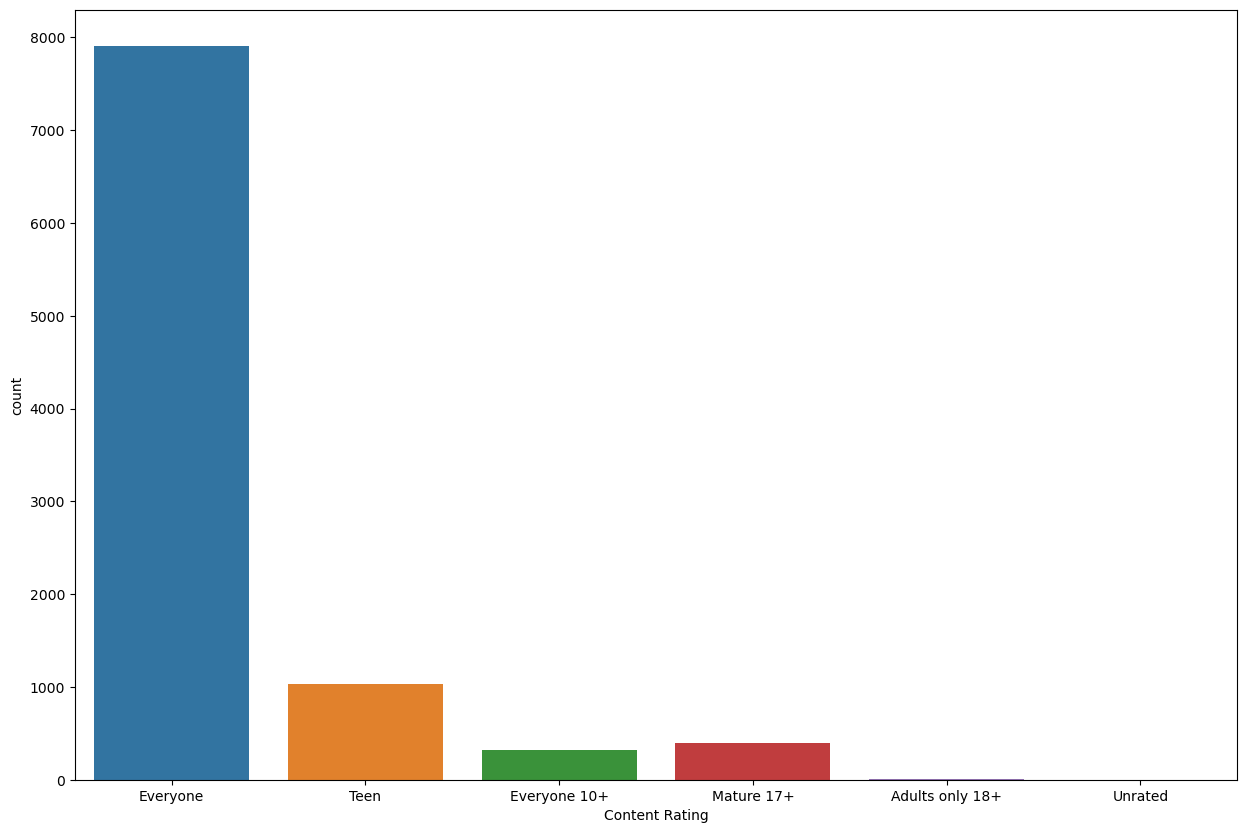

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Content Rating",data=apps)

from the previous plot , we detect that the most numbers of Apps is avilable for "Everyone"

In [ ]:
# detect the number of "Genres"
apps["Genres"].value_counts()

Tools                              826
Entertainment                      561
Education                          510
Business                           420
Medical                            395
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: Genres, Length: 118, dtype: int64

In [ ]:
# split day_month and year from Last Updated column
apps[['day_month', 'year']] = apps['Last Updated'].str.split(',', expand=True)

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day_month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June 20,2018


In [ ]:
# split day and month from Last day_month column
apps[['month', 'day']] = apps['day_month'].str.split(' ', expand=True)

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day_month,year,month,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January 7,2018,January,7
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January 15,2018,January,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August 1,2018,August,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June 8,2018,June,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June 20,2018,June,20


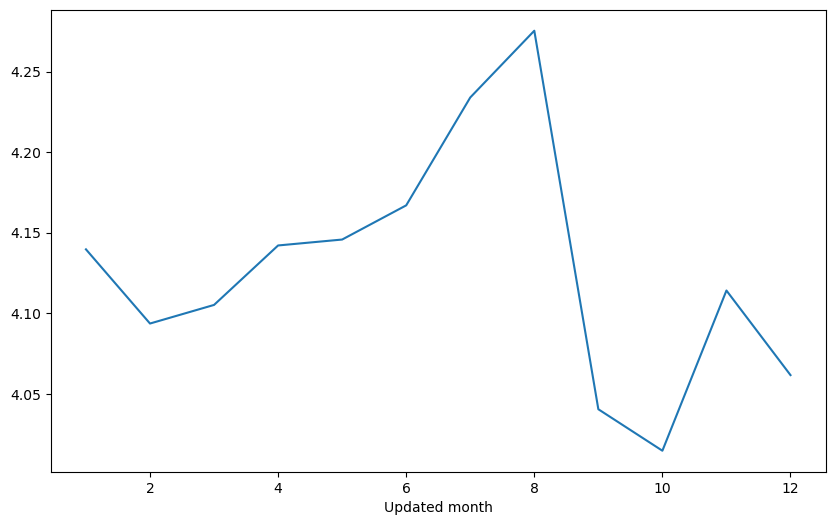

In [ ]:
apps["Updated month"] = pd.to_datetime(apps["Last Updated"]).dt.month
plt.figure(figsize = (10,6))
apps.groupby(["Updated month"])["Rating"].mean().plot()
plt.show()

From the Previous plot , We detect that the the rating starting increase and become high from "February" to "August"  

In [ ]:
# Drop the the 'Last Updated' and 'day_month' from data
apps = apps.drop(['Last Updated', 'day_month'], axis=1)

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,year,month,day,Updated month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19.0,"10,000+",Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018,January,7,1
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,January,15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018,August,1,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018,June,8,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018,June,20,6


In [ ]:
# in "Installs" i need tp replace "," with "" and remove '+' from the end of each Install 
apps["Installs"]=apps["Installs"] = apps["Installs"].str.replace(",", "").apply(lambda x: x[:-1]).replace("", "0").astype(int)

<Axes: xlabel='year', ylabel='count'>

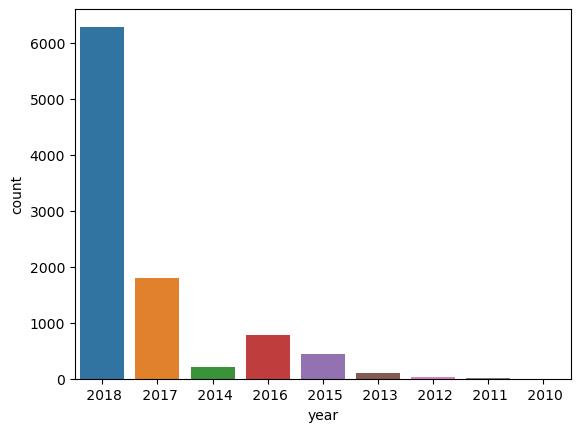

In [ ]:
sns.countplot(x="year",data=apps)

From the previous plot , we can detect the number of interaction on google Apps in "2018"

In [ ]:
# get the average of Installs based on "year"
avg_installs=apps.groupby('year')["Installs"].mean()

<Axes: xlabel='year'>

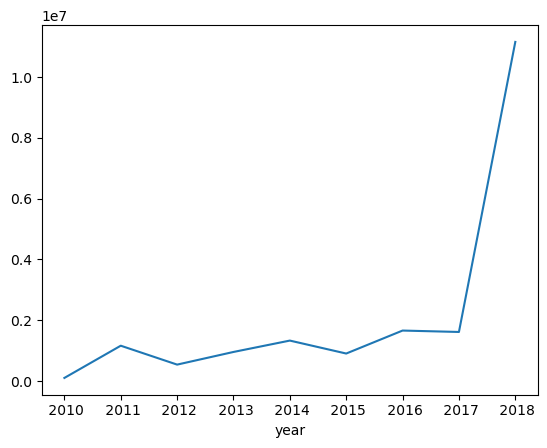

In [ ]:
avg_installs.plot()

from the prvious plot , we can detect that the number of installs increased in "2018"

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,year,month,day,Updated month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018,January,7,1
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,January,15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018,August,1,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018,June,8,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018,June,20,6


**get the most version used in each category**

In [ ]:

# Group the DataFrame by the color column
grouped_df = apps.groupby('Category')
# Find the mode of the color column in each group
mode_df = grouped_df['Android Ver'].apply(pd.Series.mode)
mode_df

Category              
ART_AND_DESIGN       0            4.1 and up
AUTO_AND_VEHICLES    0            4.0 and up
                     1            4.1 and up
BEAUTY               0          4.0.3 and up
BOOKS_AND_REFERENCE  0            4.0 and up
BUSINESS             0            4.1 and up
COMICS               0          4.0.3 and up
COMMUNICATION        0            4.1 and up
DATING               0          4.0.3 and up
EDUCATION            0    Varies with device
ENTERTAINMENT        0    Varies with device
EVENTS               0            4.1 and up
FAMILY               0            4.1 and up
FINANCE              0            4.1 and up
FOOD_AND_DRINK       0            4.1 and up
GAME                 0            4.1 and up
HEALTH_AND_FITNESS   0            4.1 and up
HOUSE_AND_HOME       0          4.0.3 and up
LIBRARIES_AND_DEMO   0            1.6 and up
LIFESTYLE            0            4.1 and up
MAPS_AND_NAVIGATION  0            4.1 and up
MEDICAL              0          

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,year,month,day,Updated month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018,January,7,1
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,January,15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018,August,1,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018,June,8,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018,June,20,6


Data exploration of reviews DataFrame

In [ ]:
reviews.head(50)

,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
10 Best Foods for You,NaN,NaN,NaN,NaN
10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
10 Best Foods for You,Best way,Positive,1.000000,0.300000
10 Best Foods for You,Amazing,Positive,0.600000,0.900000
10 Best Foods for You,NaN,NaN,NaN,NaN
10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000


In [ ]:
# calculate the frequent of each value in "Sentiment"
opinion=reviews["Sentiment"].value_counts()
opinion

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [ ]:
# Calculate the percentage of each value in the sentiment column
sentiment_percentages = opinion / len(reviews["Sentiment"]) * 100
sentiment_percentages

Positive    37.324831
Negative    12.864142
Neutral      8.030173
Name: Sentiment, dtype: float64

the summation of three values not equal 100 , because threre are nan in data and i will delete it in preprocessing 

<Axes: xlabel='Sentiment', ylabel='count'>

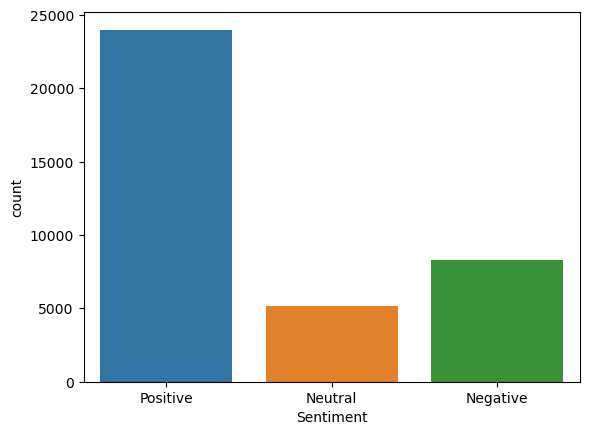

In [ ]:
sns.countplot(x="Sentiment",data=reviews)

From the Previous plot , we detect that the number of Positive feedback about apps are more than negative and neutral feedback

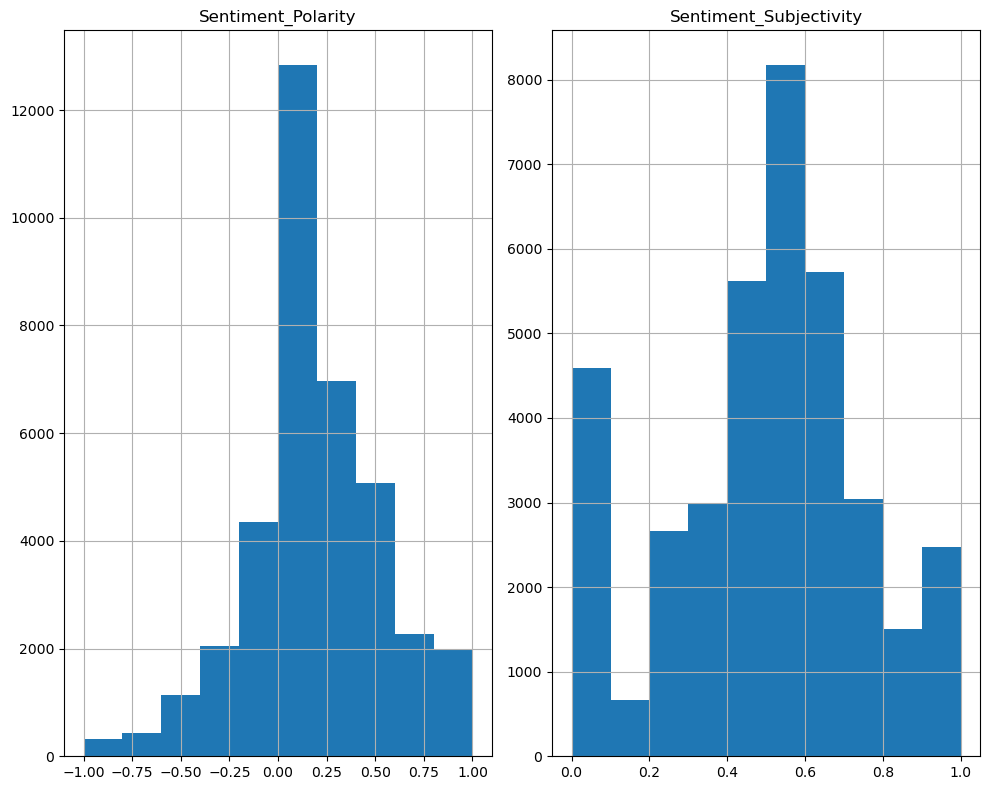

In [ ]:
# Histograms of numerical columns
reviews.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [ ]:
apps.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
year                 0
month                0
day                  0
Updated month        0
dtype: int64

In [ ]:
# get the percentage of null value in each column 
null_rates = (apps.isnull().sum() / apps.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

App                0.0000%
Category           0.0000%
Rating            15.1465%
Reviews            0.0000%
Size              12.7032%
Installs           0.0000%
Type               0.0000%
Price              0.0000%
Content Rating     0.0000%
Genres             0.0000%
Current Ver        0.0828%
Android Ver        0.0207%
year               0.0000%
month              0.0000%
day                0.0000%
Updated month      0.0000%
dtype: object


**Get the Pattern And Mechanism of Null Values**


<Axes: >

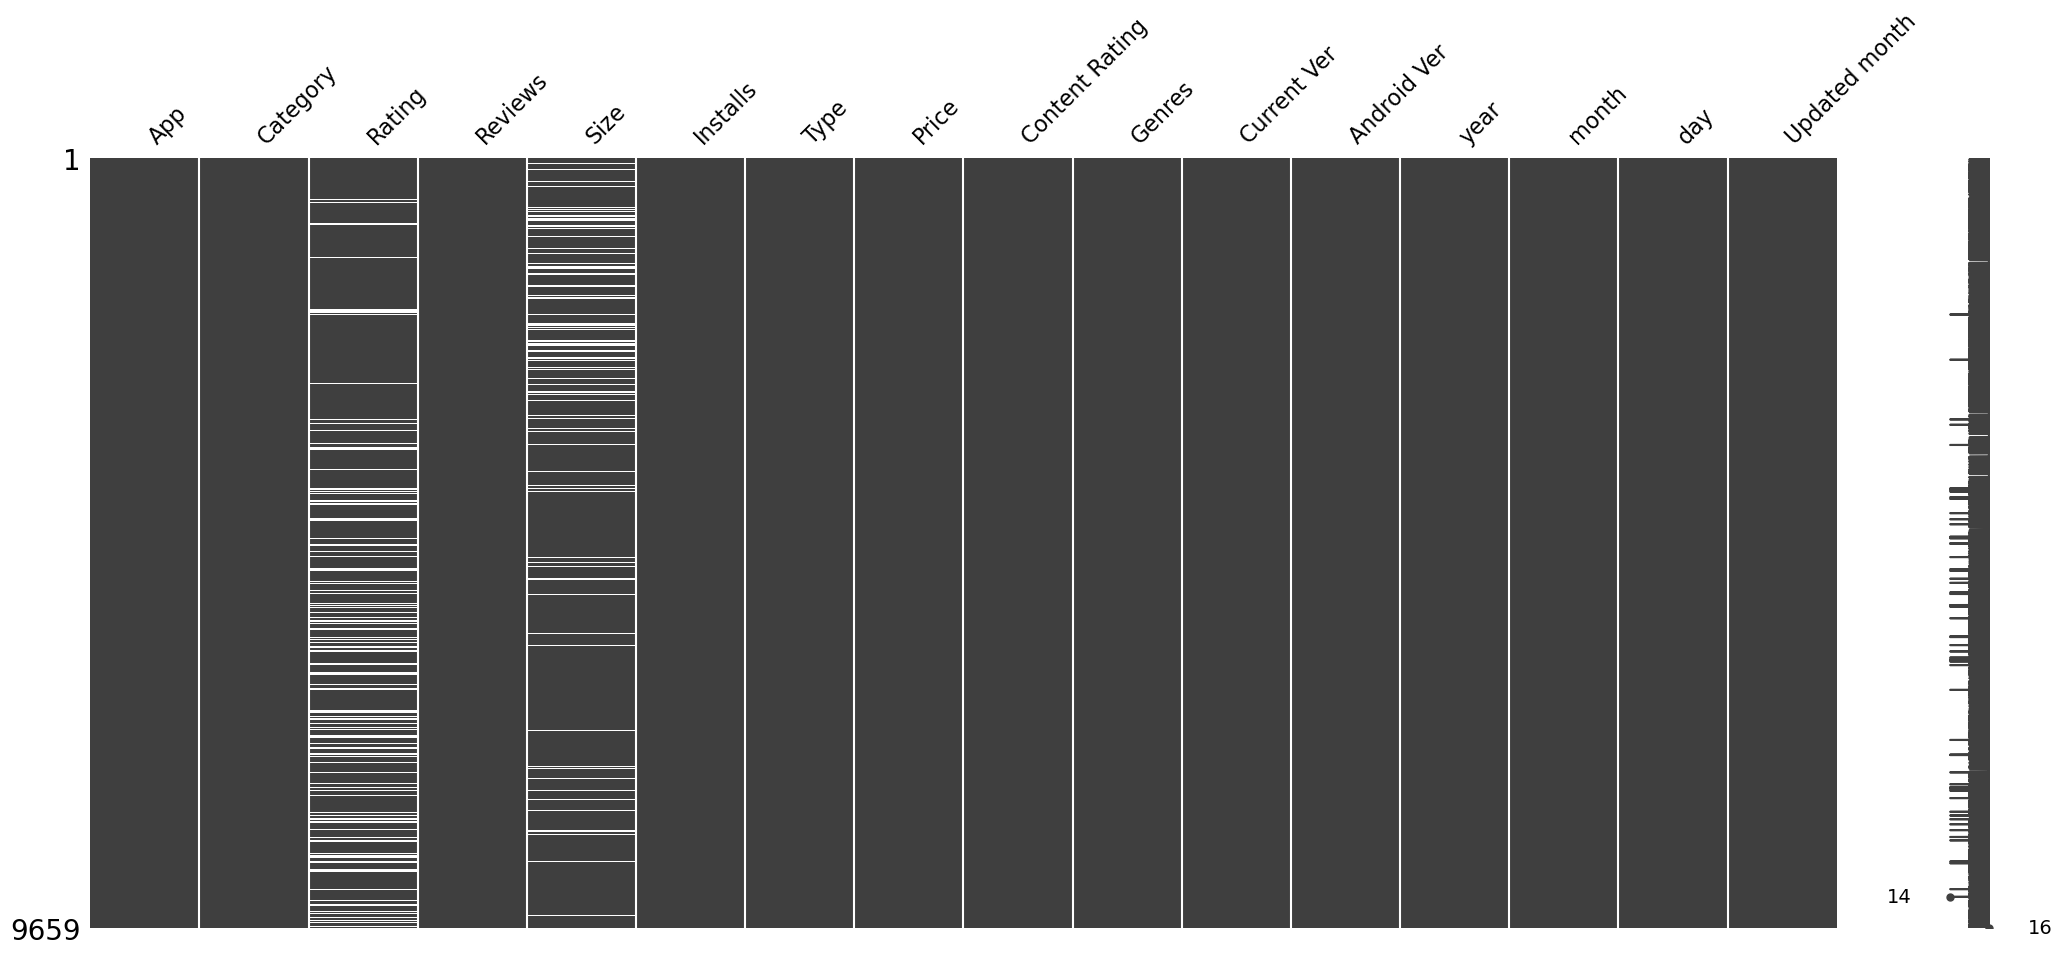

In [ ]:
# Create a heatmap of the null values in the columns
import missingno as msno
msno.matrix(apps)

the Mechanism is of "size" and "Rating" is "MCAR" because No detrminstic Pattern of null values in two feature and the Pattern is "General Pattern"

Delete Rows that contain null values

In [ ]:
apps=apps.dropna()

In [ ]:
# check apps after deleting null values
apps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
year              0
month             0
day               0
Updated month     0
dtype: int64

Now,no null values in "Apps" DataFrame 

**Check Dublication**

In [ ]:
duplicates = apps.duplicated().sum()
duplicates

0

No Data duplication in "Apps" DataFrame

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,year,month,day,Updated month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018,January,7,1
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,January,15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018,August,1,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018,June,8,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018,June,20,6


**Price**

Check outlier of Price

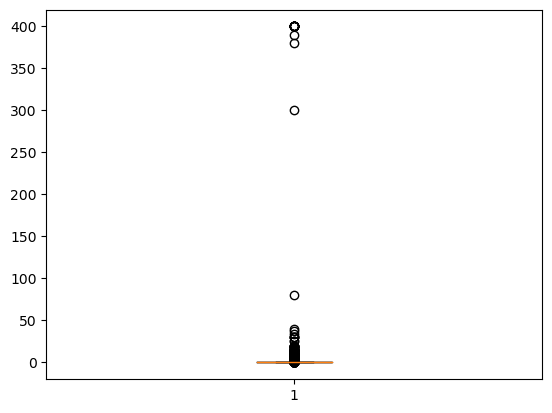

In [ ]:
plt.boxplot(apps.Price)
plt.show()

remove outlier

<Axes: xlabel='Price', ylabel='Density'>

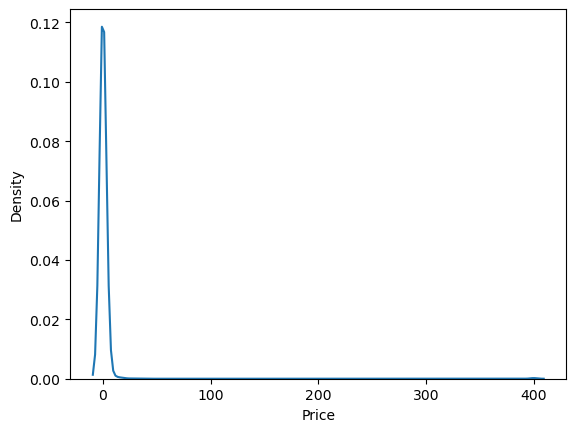

In [ ]:
sns.kdeplot(x="Price", data=apps)

In [ ]:
apps = apps[apps.Price<=30]
apps.shape

(7002, 16)

**Installs**

Check Outlier

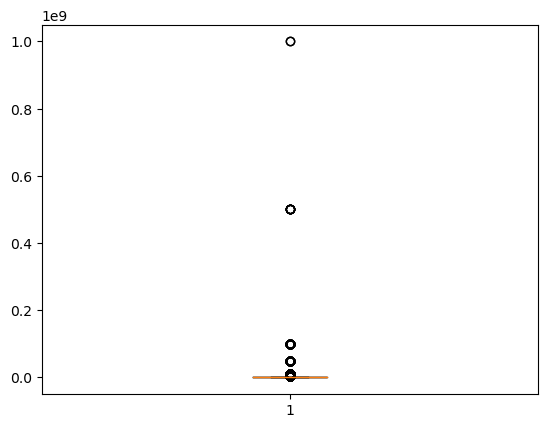

In [ ]:
plt.boxplot(apps.Installs)
plt.show()

<Axes: xlabel='Installs', ylabel='Density'>

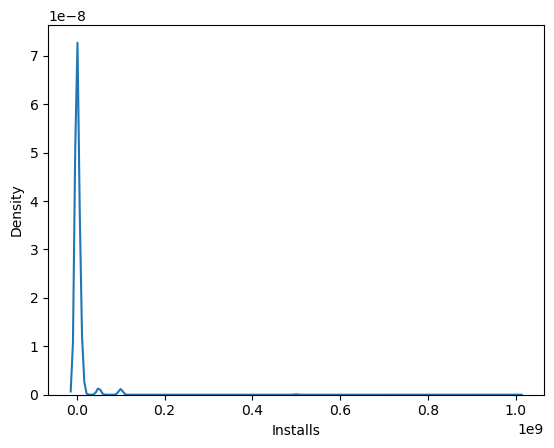

In [ ]:
sns.kdeplot(x="Installs", data=apps)

remove outlier

In [ ]:
apps = apps[apps.Installs<=30000000]

In [ ]:
reviews.isna().sum()

Review                    26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

**Get the Pattern And Mechanism of Null Values**

<Axes: >

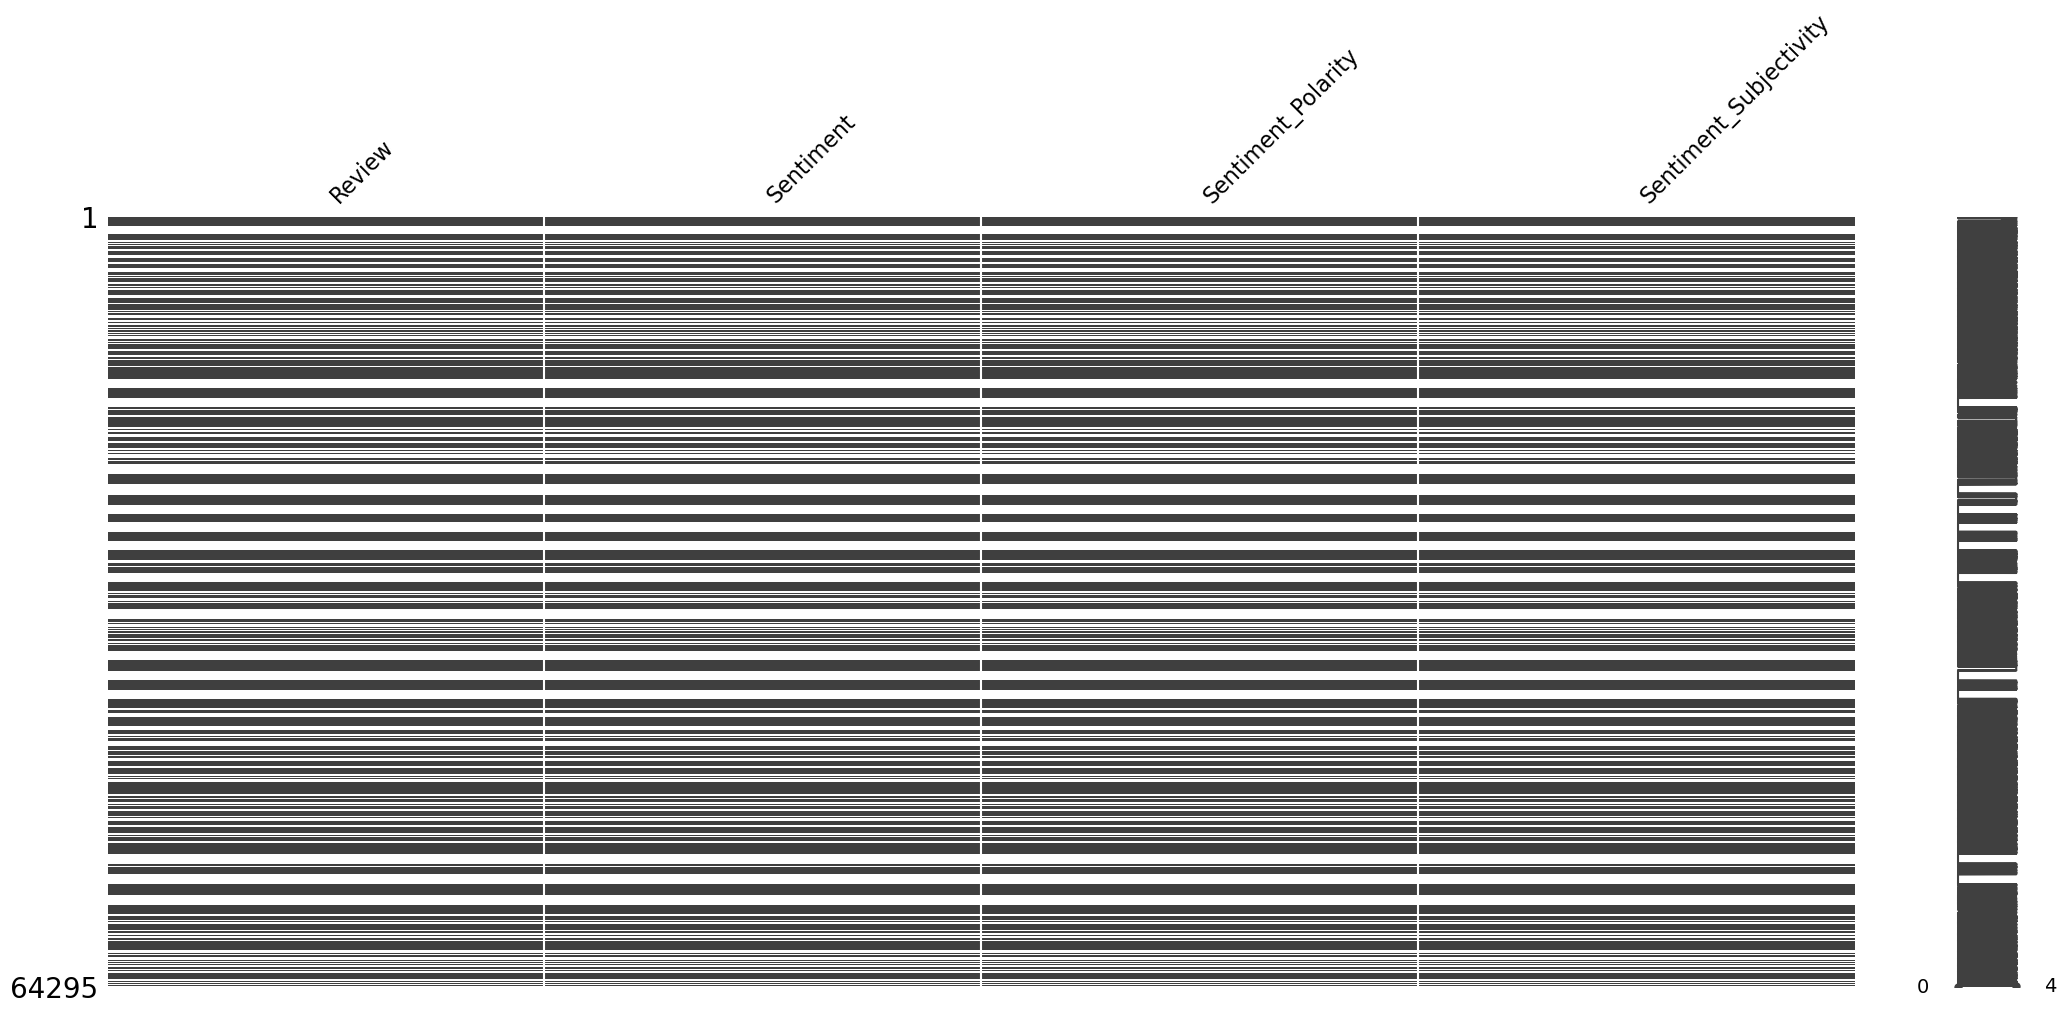

In [ ]:
msno.matrix(reviews)

the Mechanism is of "Review","Sentiment_Polarity" ,"Sentiment_Subjectivity" and "Sentiment" is "MAR" because when one of these features contain null the other features contain null and when one of these features contain values , other features contain values and the Pattern is "General Pattern"

In [ ]:
#get the percentage of null value in each column 
null_rates = (reviews.isnull().sum() / reviews.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

Review                    41.7886%
Sentiment                 41.7809%
Sentiment_Polarity        41.7809%
Sentiment_Subjectivity    41.7809%
dtype: object


In [ ]:
reviews.head()

,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
10 Best Foods for You,NaN,NaN,NaN,NaN
10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Using Simple Imputer to fill null values

In [ ]:
# I will Use simple imputer to fill the values of "Sentiment_Subjectivity", using mean strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(reviews[["Sentiment_Subjectivity"]])
reviews["Sentiment_Subjectivity"] = imputer.transform(reviews[["Sentiment_Subjectivity"]])

In [ ]:
# I will Use simple imputer to fill the values of "Sentiment_Polarity", using mean strategy
imputer = SimpleImputer(strategy="mean")
imputer.fit(reviews[["Sentiment_Polarity"]])
reviews["Sentiment_Polarity"] = imputer.transform(reviews[["Sentiment_Polarity"]])

In [ ]:
# Get the mode of the "Sentiment" column
sentiment_mode = reviews['Sentiment'].mode()[0]
# Replace the non-values with the mode
reviews['Sentiment'].fillna(sentiment_mode, inplace=True)

In [ ]:
# Get the mode of the "Review" column
Review = reviews['Review'].mode()[0]
# Replace the non-values with the mode
reviews['Review'].fillna(sentiment_mode, inplace=True)

**Check Null values After Apply SimpleImputer**

In [ ]:
reviews.isna().sum()

Review                    0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

**Check Duplication**

In [ ]:
duplicates = reviews.duplicated().sum()
duplicates

36299

Delete Duplication

In [ ]:
# Drop duplicates
reviews = reviews.drop_duplicates()

In [ ]:
# check duplicates after dopping all duplicates
duplicates = reviews.duplicated().sum()
print(duplicates)

0


**Get the correlation of "Apps" table**

<Axes: >

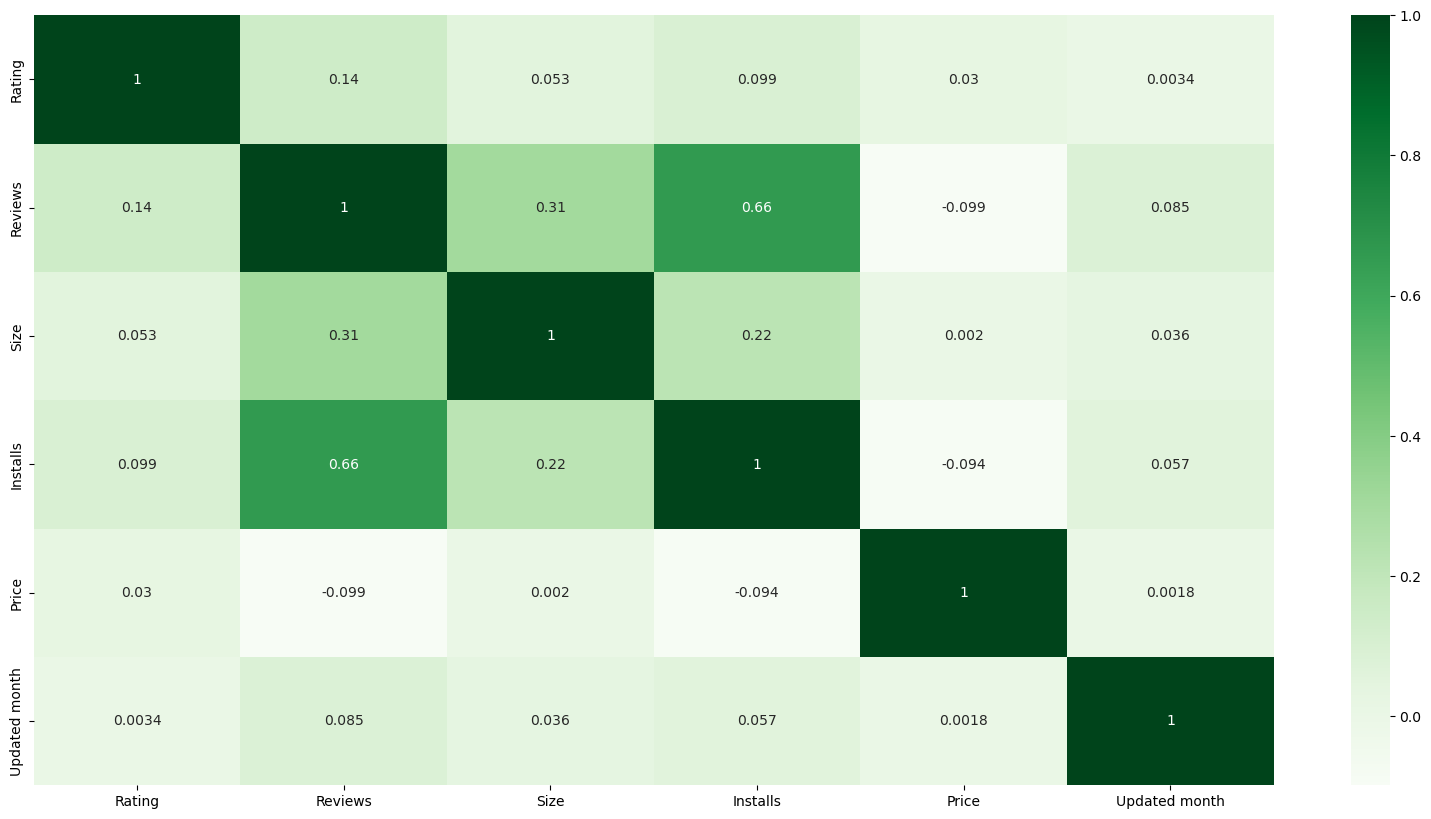

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# Calculate the correlation matrix
corr = apps.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True,cmap='Greens')

**Get the correlation of "Reviews" table**

<Axes: >

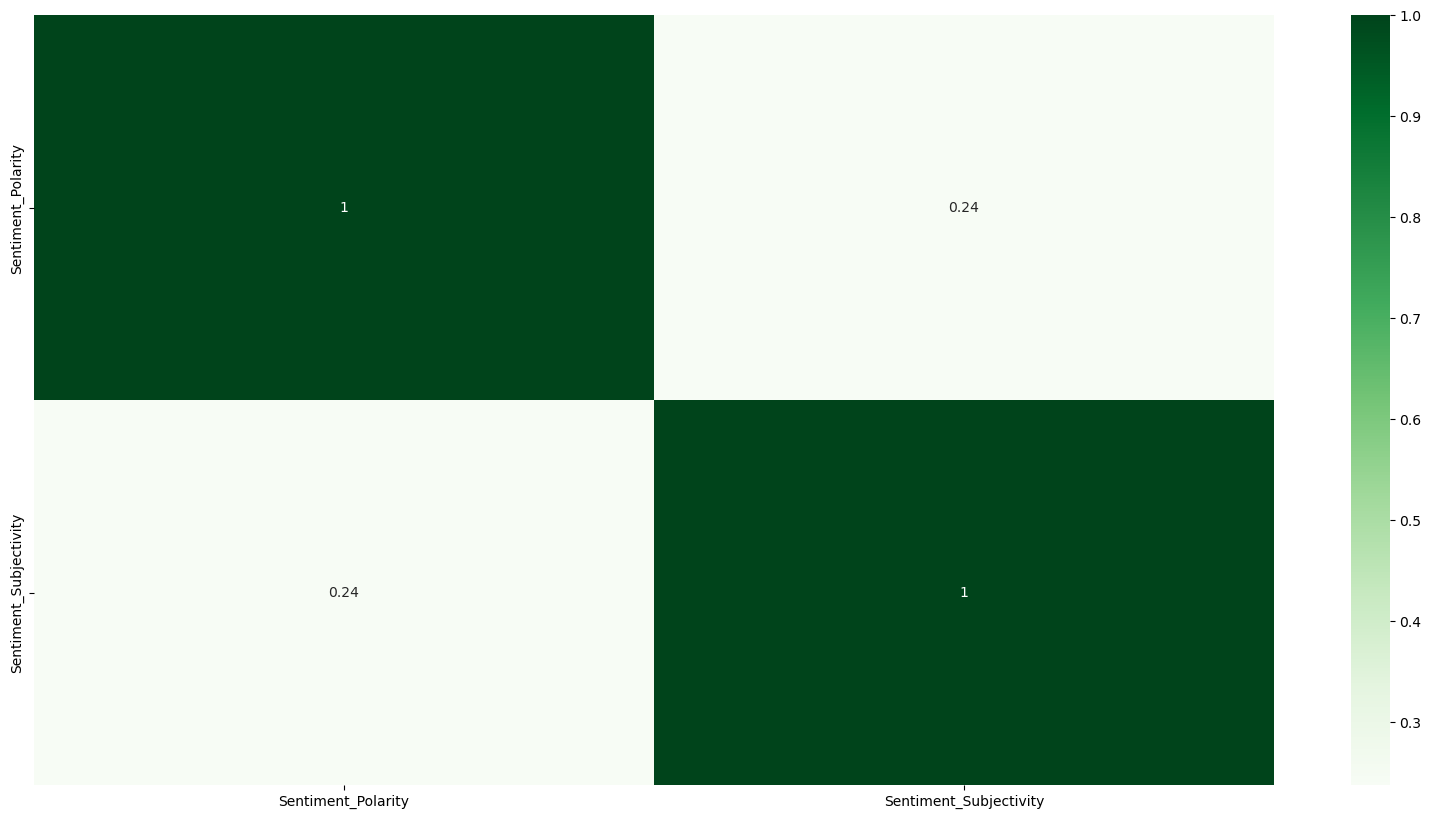

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# Calculate the correlation matrix
corr = reviews.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True,cmap='Greens')

**Merge Tables**

In [ ]:
# make an inner join between join_vertically table and userscore table on 'card_id'
final_table=apps.merge(reviews,on="App",how="inner") 

In [ ]:
final_table  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,year,month,day,Updated month,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,January,15,1,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,January,15,1,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,January,15,1,I love colors inspyering,Positive,0.500000,0.600000
3,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,January,15,1,omgggggg,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,January,15,1,It cute.,Positive,0.500000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,Avakin Life - 3D virtual world,FAMILY,4.4,14.058749,91.0,10000000,Free,0.0,Teen,Role Playing,1.021.10,4.1 and up,2018,July,3,7,This turned better I expected tbh I'm glad. I'...,Positive,0.330000,0.707778
16144,Avakin Life - 3D virtual world,FAMILY,4.4,14.058749,91.0,10000000,Free,0.0,Teen,Role Playing,1.021.10,4.1 and up,2018,July,3,7,I like apartments n stuffs minus players Many ...,Negative,-0.181997,0.505373
16145,Avakin Life - 3D virtual world,FAMILY,4.4,14.058749,91.0,10000000,Free,0.0,Teen,Role Playing,1.021.10,4.1 and up,2018,July,3,7,Hey I've playing year half last year I took 2 ...,Positive,0.002721,0.391497
16146,Avakin Life - 3D virtual world,FAMILY,4.4,14.058749,91.0,10000000,Free,0.0,Teen,Role Playing,1.021.10,4.1 and up,2018,July,3,7,"Annoying loading. It stopped 80 percent, data ...",Negative,-0.275000,0.720000


In [ ]:
# check null values in final_table after join two tables
final_table.isna().sum() 

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Current Ver               0
Android Ver               0
year                      0
month                     0
day                       0
Updated month             0
Review                    0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

**Conclusion**

The majority of apps on the Google Play Store are free and have an average rating of between 4 and 4.5 stars.

Most of these apps are family-friendly, educational, brain games, or creativity apps. 

Teens install the most apps during the summer months, between February  and August. Larger apps are typically higher rated and paid. 

Most apps have an "Everyone" content rating, meaning they are appropriate for all ages.